In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

path = kagglehub.dataset_download("annawang021/jan24flights-cleaned")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/jan24flights-cleaned


In [13]:
df = pd.read_csv(path + "/cleaned_data.csv")
df.head()

,FL_DATE,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY_NEW,DISTANCE
0,1/1/2024 12:00:00 AM,AA,"New York, NY",NY,"Los Angeles, CA",CA,900,852.0,-8.0,1124.0,0.0,2475.0
1,1/1/2024 12:00:00 AM,AA,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232.0,-3.0,2107.0,8.0,2475.0
2,1/1/2024 12:00:00 AM,AA,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754.0,-6.0,2041.0,0.0,2611.0
3,1/1/2024 12:00:00 AM,AA,"Los Angeles, CA",CA,"Boston, MA",MA,750,742.0,-8.0,1638.0,19.0,2611.0
4,1/1/2024 12:00:00 AM,AA,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458.0,-4.0,1654.0,0.0,1009.0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Create 'is_delayed' column before defining X and y
df['is_delayed'] = (df['ARR_DELAY_NEW'] > 15).astype(int)

X = df.drop(['FL_DATE', 'ARR_DELAY_NEW', 'is_delayed'], axis=1)  # Exclude target, date and is_delayed
y = df['is_delayed']  # Target variable is now is_delayed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [17]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [26]:
from sklearn.pipeline import Pipeline
from sklearn import set_config

set_config(display='diagram')  # This will enable visualization of the pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression classifier
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'DISTANCE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['MKT_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST_CITY_NAME', 'DEST_STATE_ABR'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [27]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9188495028771377
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85645
           1       0.90      0.73      0.81     26098

    accuracy                           0.92    111743
   macro avg       0.91      0.85      0.88    111743
weighted avg       0.92      0.92      0.92    111743



In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08115049712286228


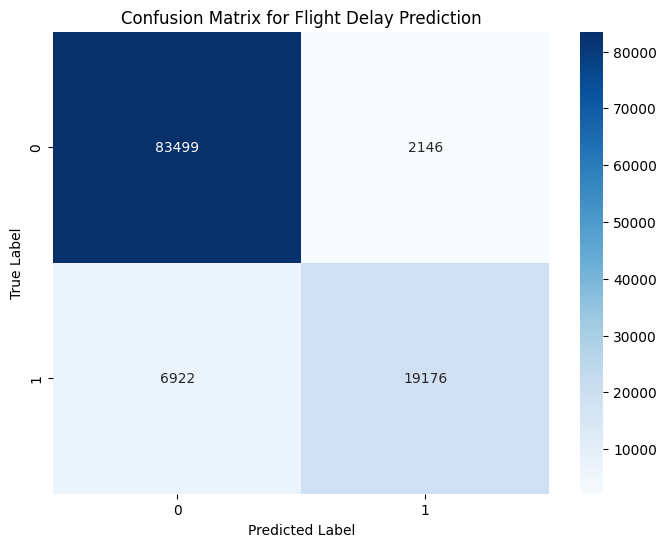

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Flight Delay Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()